In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import eli5
from eli5.sklearn import PermutationImportance
import shap
import xgboost as xgb

In [8]:
data = pd.read_csv('../data/curated/outliers_removed.csv')
data.head()

,Unnamed: 0,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price
0,5,3000,1,34652.148872,4.0,45.0,1,440.0
1,6,3000,1,34652.148872,4.0,45.0,1,440.0
2,7,3000,1,34652.148872,4.0,45.0,1,440.0
3,8,3000,1,34652.148872,4.0,45.0,1,440.0
4,9,3000,1,34652.148872,4.0,45.0,1,440.0


In [9]:
data = data.drop('Unnamed: 0',axis=1)

x_train = data[['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']]
y_train = data['Weekly Rental Price']

data.head()

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price
0,3000,1,34652.148872,4.0,45.0,1,440.0
1,3000,1,34652.148872,4.0,45.0,1,440.0
2,3000,1,34652.148872,4.0,45.0,1,440.0
3,3000,1,34652.148872,4.0,45.0,1,440.0
4,3000,1,34652.148872,4.0,45.0,1,440.0


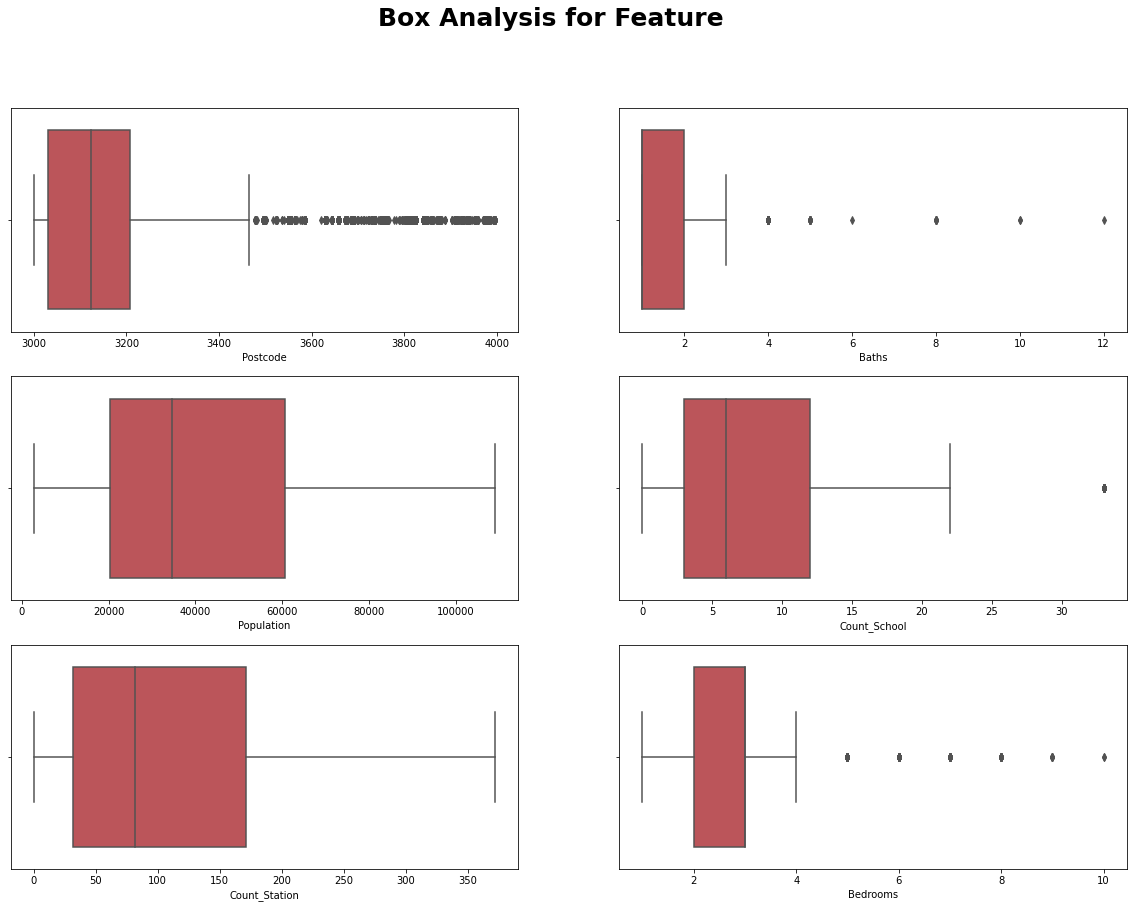

In [10]:
columns = ['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']

f, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 14))
f.suptitle('Box Analysis for Feature', weight='bold', fontsize=25)

for i, col in enumerate(columns):
    sns.boxplot(x=x_train[col],ax=axes.flatten()[i], color='#cc444b')

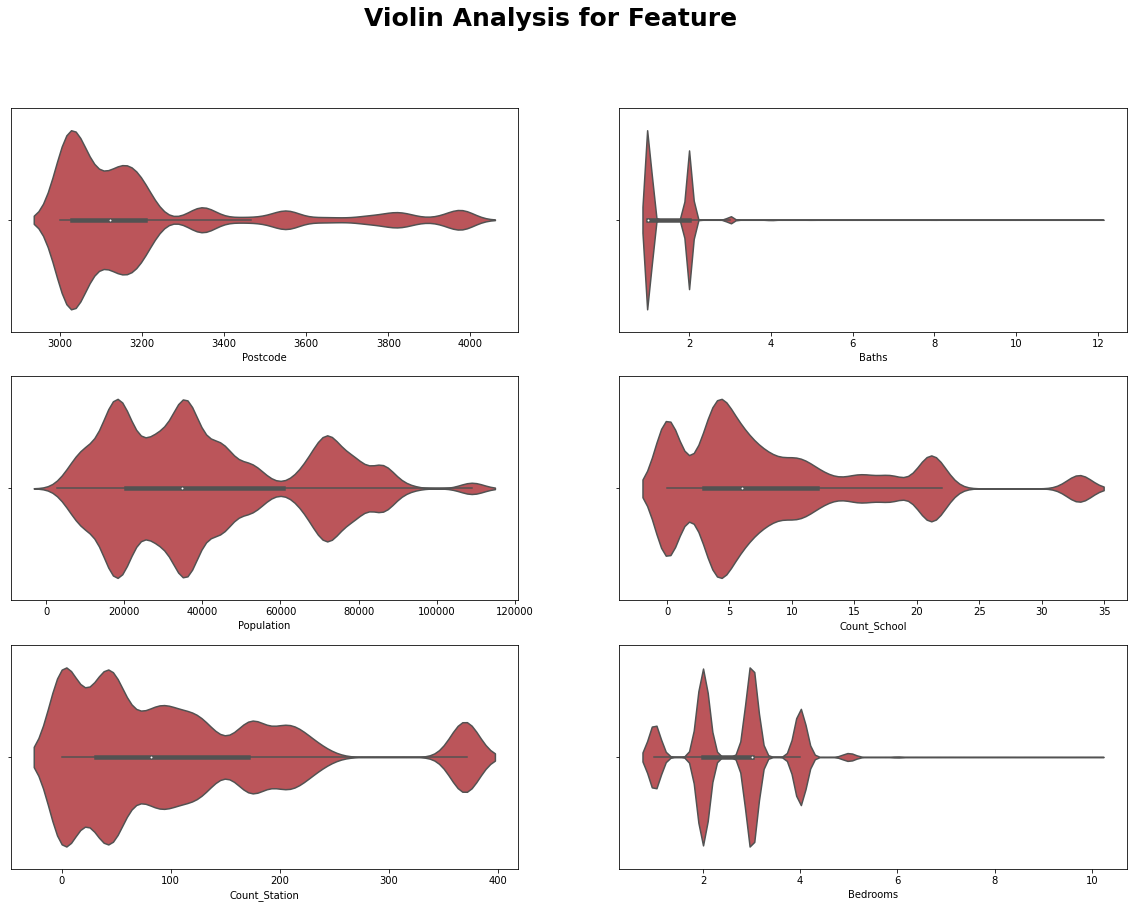

In [11]:
columns = ['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']

f, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 14))
f.suptitle('Violin Analysis for Feature', weight='bold', fontsize=25)

for i, col in enumerate(columns):
    sns.violinplot(x=x_train[col],ax=axes.flatten()[i], color='#cc444b')

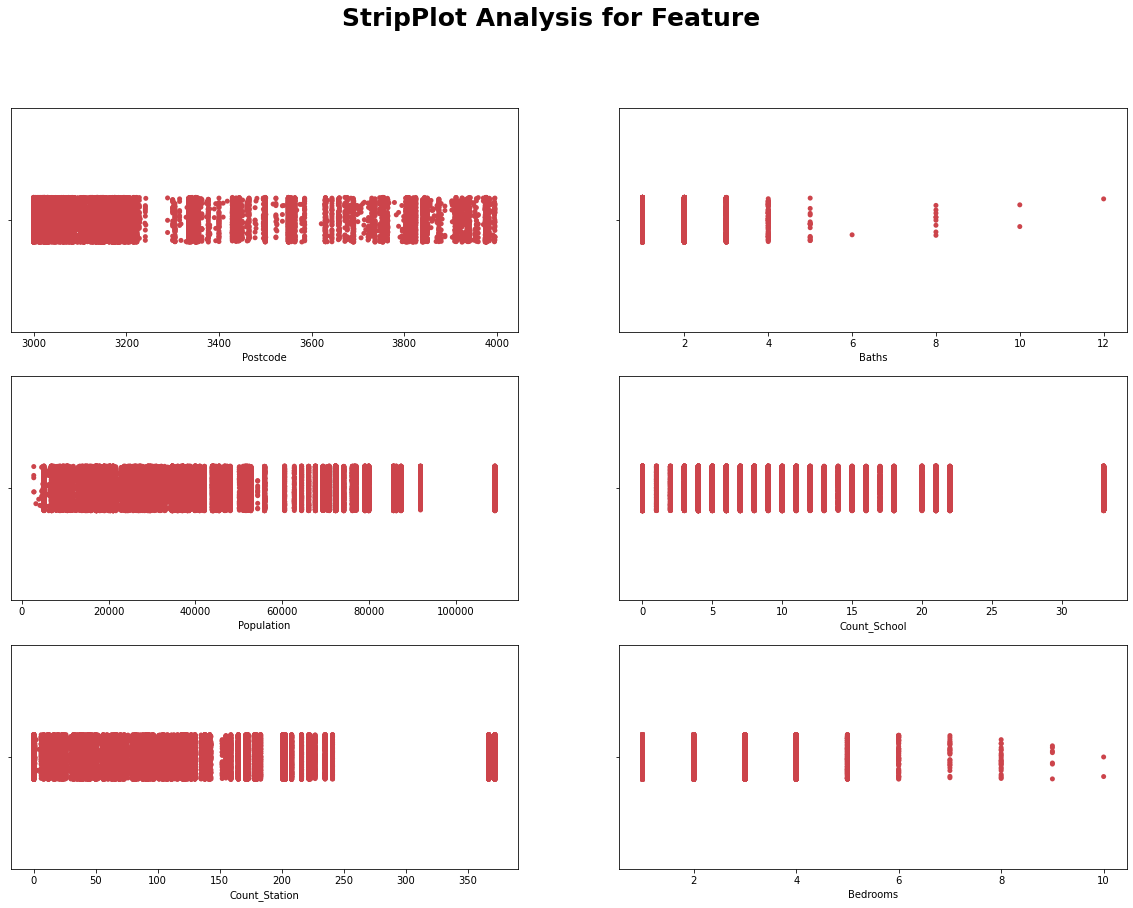

In [12]:
columns = ['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']

f, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 14))
f.suptitle('StripPlot Analysis for Feature', weight='bold', fontsize=25)

for i, col in enumerate(columns):
    sns.stripplot(x=x_train[col],ax=axes.flatten()[i], color='#cc444b')

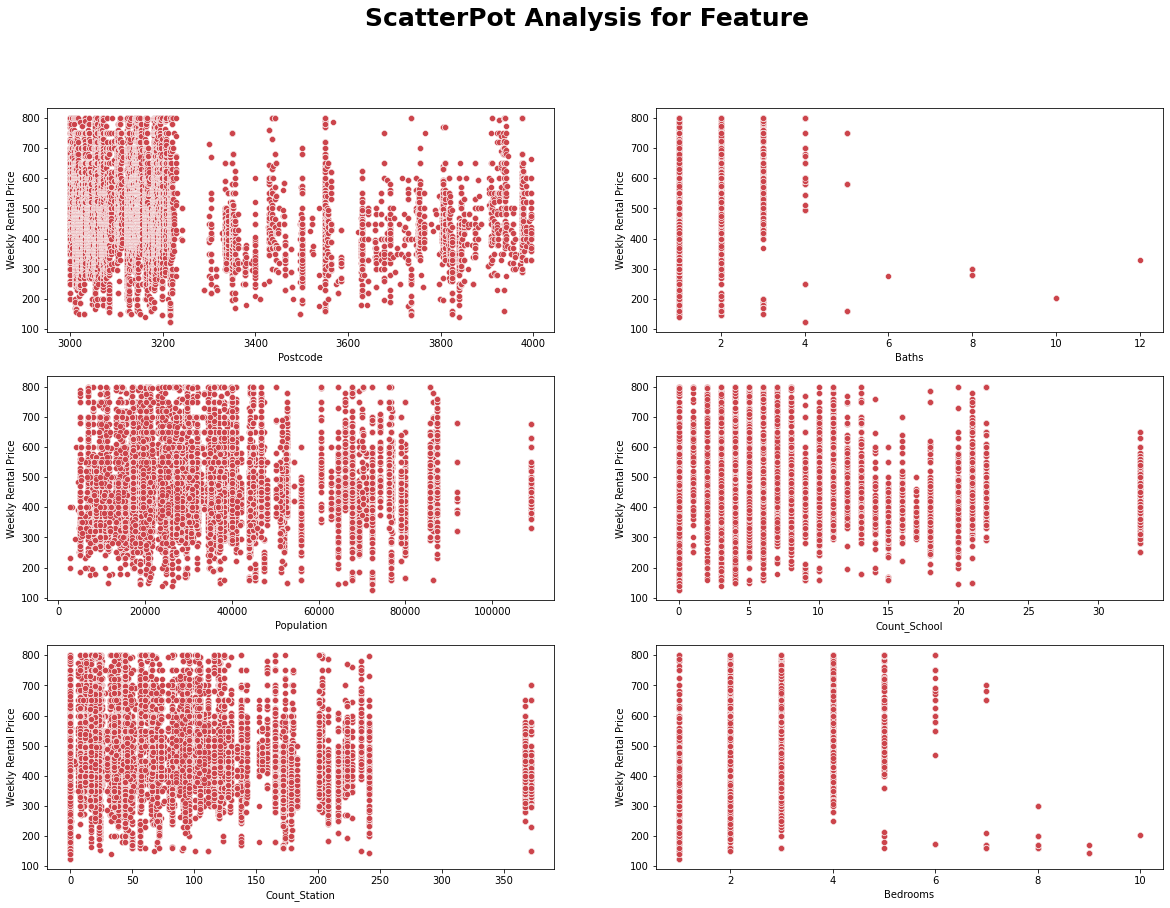

In [13]:

columns = ['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']

f, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 14))
f.suptitle('ScatterPot Analysis for Feature', weight='bold', fontsize=25)

for i, col in enumerate(columns):
    sns.scatterplot(x=x_train[col],y =y_train, ax=axes.flatten()[i], color='#cc444b')

In [14]:
correlations = data.corr(method='pearson')
print(correlations['Weekly Rental Price'].sort_values(ascending=False).to_string())

Weekly Rental Price    1.000000
Baths                  0.336146
Bedrooms               0.306356
Population            -0.042395
Postcode              -0.072693
Count_School          -0.096733
Count_Station         -0.114964


In [16]:
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RandomizedSearchCV

In [18]:
model_xgbr = XGBRegressor(random_state=42,n_jobs=-1)
# Pipeline variable for RandomSearch
#pipe_rs_xgb = make_pipeline(XGBRegressor(random_state=42,n_jobs=-1))

# # Params for RandomSearch
# paramajama = {'simpleimputer__strategy':['meadian','mean'],
#               'xgbregressor__max_depth':range(5,35,5),
#               'xgbregressor__learning_rate':np.arange(0.2,1,0.1),
#               'xgbregressor__booster':['gbtree','gblinear','dart'],
#               'xgbregressor__min_child_weight':range(1,10,1),
#               'xgbregressor__gamma':np.arange(0,1,0.1),
#               'xgbregressor__max_delta_step':np.arange(0,1,0.1),
#               'xgbregressor__subsample':np.arange(0.5,1,0.1)}

# # RandomSearch Model
# model_rs_xgbr = RandomizedSearchCV(pipe_rs_xgb,
#                                    param_distributions = paramajama,
#                                    n_iter=20,
#                                    n_jobs=-1)

# Model fit
model_xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


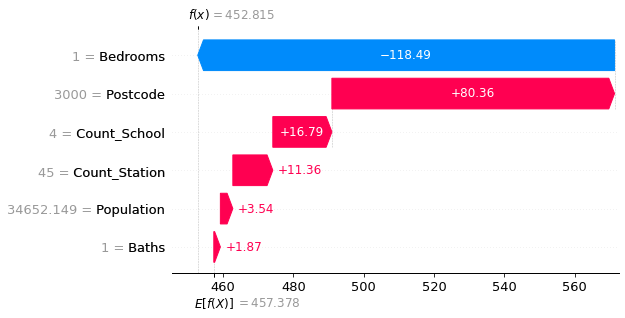

In [19]:
samp = pd.DataFrame(x_train,columns=columns)
# Shap waterfall plot showing feature importance
explainer = shap.TreeExplainer(model_xgbr)
shap_values=explainer(samp.head(1))
shap.plots.waterfall(shap_values[0])

In [20]:
# Shap force plot also showing feature importance
explainer = shap.TreeExplainer(model_xgbr)
shap_values = explainer.shap_values(samp.head(1))
shap.initjs()
shap.force_plot(base_value = explainer.expected_value,
                shap_values=shap_values,
                features=samp.head(1))

In [22]:
# Permutation importance for features used in XGBR model
perm = PermutationImportance(model_xgbr,random_state=42).fit(x_train,y_train)
eli5.show_weights(perm, feature_names = samp.columns.tolist())

Weight,Feature
1.0002 ± 0.0206,Bedrooms
0.4884 ± 0.0057,Postcode
0.2387 ± 0.0030,Baths
0.2271 ± 0.0031,Count_School
0.2163 ± 0.0048,Count_Station
0.0825 ± 0.0031,Population
